Python Seminar (AY250) UC Berkeley

# Super simple webpage access

In [1]:
import urllib2 # URL = Uniform Resource Locator

# even with the government shut down, some .gov URLs still work!
# chemistry data portal
url = "http://www.nist.gov/chem-srd-portal.cfm"  
response = urllib2.urlopen(url) # response is a file-like object
html_data = response.read()
response.close() # close response as you would a normal file
print html_data[:300]

<!DOCTYPE html>
<!-- Content Copyright NIST CM CR -->
<head>
<title>National Institute of Standards and Technology Page Not Found</title>
<link rel="stylesheet" href="/style/nist-styles.css" type="text/css" />
<link rel="stylesheet" href="/style/nist-subsite-overrides.css" type="text/css" />
<!--[if


Small aside: if you have HTML data that you want to render, you can use `webbrowser` module

see http://docs.python.org/library/webbrowser.html

In [2]:
import webbrowser
open("/tmp/tmp.html","w").write(html_data)
webbrowser.open("file:///tmp/tmp.html")

True

# Scripting an HTTP GET request

In [6]:
import urllib2, urllib

# create a dictionary to store the GET data
get_info = {"q": "Chechanover, Aaron", "sort": "relevance"} 

# encode the data in proper URL format
url_values = urllib.urlencode(get_info) 
print url_values

q=Chechanover%2C+Aaron&sort=relevance


In [8]:
url = "http://pubget.com/search"

# open the url as before
response = urllib2.urlopen(url,data=url_values) 
#alternatively: urllib2.urlopen(url + "?" + url_values)
html = response.read()
response.close()
print html[:3000]





<!DOCTYPE html>

<html lang="en" itemscope itemtype="http://schema.org/Article" prefix="og: http://ogp.me/ns#">
<head><script type="text/javascript">var NREUMQ=NREUMQ||[];NREUMQ.push(["mark","firstbyte",new Date().getTime()]);</script>

<meta charset="utf-8" /><title>Articles on Chechanover, Aaron - Pubget</title><meta content="Quickly find published papers on Chechanover, Aaron. Pubget provides immediate access to PDFs of journal articles and research papers." name="description" /><link href="http://pubget.com/search?q=Chechanover%2C+Aaron" rel="canonical" /><link href="http://pubget.com/search?q=Chechanover%2C+Aaron&amp;page=2" rel="next" /><link href="http://pubget.com/feed?q=Chechanover%2C+Aaron" rel="alternate" title="ATOM" type="application/atom+xml" /><link href="/pubget.xml" rel="search" title="Pubget Search" type="application/opensearchdescription+xml" /><link href="//d1ifo256av5q1r.cloudfront.net/assets/favicon-e20d3e5eb843cc16d1aa297ad7c26e67.ico" rel="shortcut icon" />


# Scripting an HTTP POST request

In [9]:
import urllib2, urllib
data = {}
data["author"] = "Sagan, Carl"
params = urllib.urlencode(data) # same urlencode method
url = "http://adsabs.harvard.edu/cgi-bin/nph-abs_connect"
response = urllib2.urlopen(url, params) 
# POST request is indicated by including the params in urlopen
html = response.read()
response.close()
print html[300:700]

set=iso-8859-1">
<TITLE>Author Query Results</TITLE>
<SCRIPT language="JavaScript" type="text/javascript">
<!-- protect from old browsers
var adr = [ "http://adsabs" , "harvard" , "edu" ] ;
document.write("" + String.fromCharCode(60) + "link rel=\"alternate\" type=\"application/rss+xml\" title=\"ADS RSS feed\" href=\"" + adr.join(".") + "/cgi-bin/nph-abs_connect?type=RSS&#38;data_type=RSS&#38;cook


# Access an FTP server

In [10]:
import ftplib
ftp = ftplib.FTP("ftp.cac.psu.edu")
ftp.login()

'230 Guest login ok, access restrictions apply.'

In [11]:
ftp.cwd("/pub/folk_music/sheet_music")

'250 CWD command successful.'

In [12]:
ftp.

total 2746
-rw-rw-r--   1 1018       66004 Jun 11  1996 Childgrove.JPG
-rw-rw-r--   1 1018       81269 Jun 11  1996 Durang'sHornpipe.JPG
-rw-rw-r--   1 1018       76273 Jun 11  1996 FemaleSaylor.JPG
-rw-rw-r--   1 1018      101445 Jun 11  1996 Hoshaya.JPG
-rw-rw-r--   1 1018      129214 Jun 11  1996 Mel'sMelody.JPG
-rw-rw-r--   1 1018       87422 Jun 11  1996 Nathan'sSong.JPG
-rw-rw-r--   1 1018       73262 Jun 11  1996 NextYear.JPG
-rw-rw-r--   1 1018      104283 Jun 11  1996 OffToCalifornia.JPG
-rw-rw-r--   1 1018       95261 Jun 11  1996 PlanxtyFannyPower.JPG
-rw-rw-r--   1 1018       72635 Jun 11  1996 PlanxtyIrwin.JPG
-rw-rw-r--   1 1018      127512 Jun 11  1996 RightsOfMan.JPG
-rw-rw-r--   1 1018      124910 Jun 11  1996 SecondAnniversaryWaltz.JPG
-rw-rw-r--   1 1018      103962 Jun 11  1996 Sheebeg.and.Sheemore.JPG
-rw-rw-r--   1 1018       87386 Dec 15  1995 Star_of_the_County_Down.JPG


In [13]:
ftp.retrbinary('RETR OffToCalifornia.JPG', open('music.jpg', 'wb').write)

'226 Transfer complete.'

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


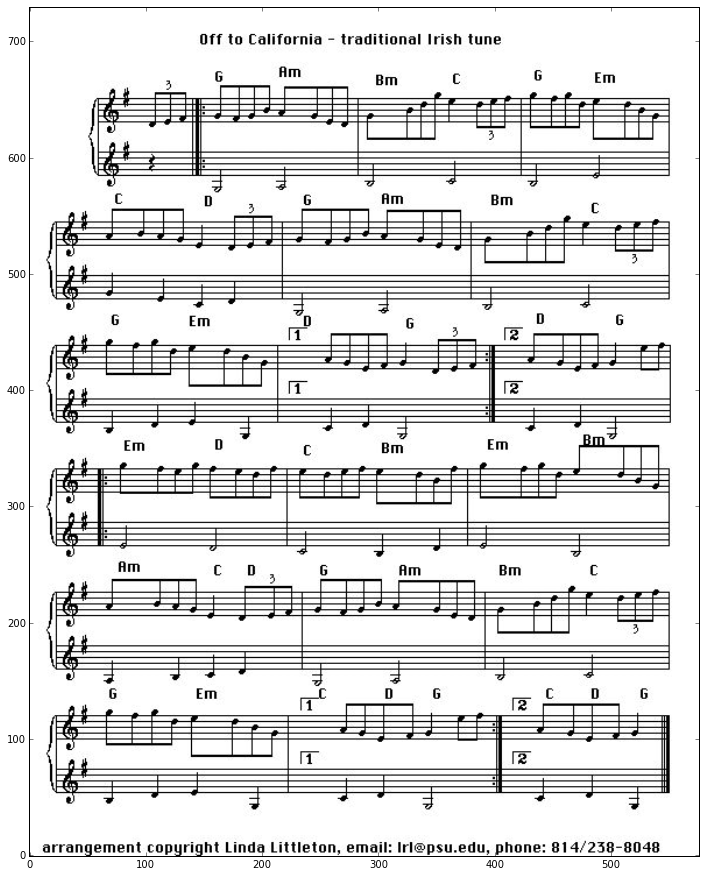

In [15]:
figure(figsize=(12,16))
im = plt.imread("music.jpg")
imshow(im[::-1], origin="lower")

# Parsing HTML with BeautifulSoup

See: http://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [20]:
import urllib2
response = urllib2.urlopen("http://words.bighugelabs.com/")
html = response.read()
response.close()

# pip install beautifulsoup4
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
forms = soup.findAll("form")
forms

[<form action="/" id="inputform" method="get" onsubmit="return lookup()">
<input class="input" id="q" name="q" size="40" value=""/> <input type="submit" value="Lookup"/>
</form>]

In [18]:
print html

<!DOCTYPE html>
<html>
<head>
<meta http-equiv="Content-type" content="text/html; charset=utf-8">
<title>Big Huge Thesaurus: Synonyms, antonyms, and rhymes (oh my!)</title>
<link rel="stylesheet" type="text/css" href="/css/main.css?v=20120531" media="screen, print">
<link rel="shortcut icon" href="/images/favicon.ico">
<link rel="apple-touch-icon" href="/images/apple-touch-icon.png">
<script type="text/javascript" src="https://ajax.googleapis.com/ajax/libs/jquery/1.7.2/jquery.min.js"></script>
</head>
<body>

  <div id="wrap">

    <div id="header">
      <h1>
        <a href="/">Big Huge Thesaurus</a>
      </h1>
      <p>
        <a href="/">Thesaurus</a>
        ·
        <a href="/blog.php">Blog post ideas</a>
        ·
        <a href="/plot.php">Story plot/loglines</a>
      </p>
      </p>
    </div>

    <div id="content">
      <script type="text/javascript">
function lookup() {
  document.location = '/'+escape($('#q').val());
  return false;
}
</script>

<div class="center">


In [23]:
links = soup.findAll("form")
for link in links:
    print link

<form action="/" id="inputform" method="get" onsubmit="return lookup()">
<input class="input" id="q" name="q" size="40" value=""/> <input type="submit" value="Lookup"/>
</form>


Let's load up a whole bunch of baby names, by combining scripted webpage access with BeautifulSoup:

In [26]:
from bs4 import BeautifulSoup
url = "http://nameberry.com/search/boys_names/J"
response = urllib2.urlopen(url)
html = response.read()
response.close()
soup = BeautifulSoup(html)

In [27]:
items = soup.findAll("li", class_="name_in_list")
print items

[<li class="name_in_list grid__cell unit-4-12--med unit-3-12--wideload simple-result"><a class="name" href="/babyname/Jabari" id="name-37771"><span class="dec-blue">Jabari</span></a></li>, <li class="name_in_list grid__cell unit-4-12--med unit-3-12--wideload simple-result"><a class="name" href="/babyname/Jabbar" id="name-37783"><span class="dec-blue">Jabbar</span></a></li>, <li class="name_in_list grid__cell unit-4-12--med unit-3-12--wideload simple-result"><a class="name" href="/babyname/Jabez" id="name-46456"><span class="dec-blue">Jabez</span></a></li>, <li class="name_in_list grid__cell unit-4-12--med unit-3-12--wideload simple-result"><a class="name" href="/babyname/Jabin" id="name-51009"><span class="dec-blue">Jabin</span></a></li>, <li class="name_in_list grid__cell unit-4-12--med unit-3-12--wideload simple-result"><a class="name" href="/babyname/Jac" id="name-51229"><span class="dec-blue">Jac</span></a></li>, <li class="name_in_list grid__cell unit-4-12--med unit-3-12--wideload

In [31]:
items[35].a.get_text()

u'Jamie'

In [32]:
import urllib2, urllib
import string
from bs4 import BeautifulSoup
letters = "qwertyuioplkjhgfdsazxcvbnm"
boy_names = []
for n in string.letters[:26]:
    url = "http://nameberry.com/search/boys_names/" + n
    response = urllib2.urlopen(url)
    html = response.read()
    response.close()
    soup = BeautifulSoup(html)
    items = soup.findAll("li", class_="name_in_list")
    for item in items:
        if len(item.findAll("a")) == 1:
            boy_names.append(item.a.get_text())

In [33]:
print boy_names

[u'Aakil', u'Aalto', u'Aaron', u'Aart', u'Aaru', u'Aarush', u'Abacus', u'Aban', u'Abanito', u'Abanu', u'Abba', u'Abbas', u'Abbott', u'Abdalla', u'Abdallah', u'Abdiel', u'Abdu', u'Abdul', u'Abdullah', u'Abe', u'Abeeku', u'Abel', u'Abelard', u'Abelardo', u'Aberdeen', u'Abi', u'Abiah', u'Abiel', u'Abijah', u'Abilene', u'Abimael', u'Abir', u'Abner', u'Abraham', u'Abram', u'Abraxas', u'Absalom', u'Abt', u'Abush', u'Ab\xe1n', u'Acacius', u'Ace', u'Achille', u'Achilles', u'Acker', u'Actaeon', u'Acton', u'Adagio', u'Adaiah', u'Adair', u'Adalius', u'Adam', u'Adan', u'Addar', u'Addison', u'Adelio', u'Adeon', u'Adhit', u'Adil', u'Adir', u'Adiv', u'Adlai', u'Adler', u'Adolfo', u'Adolph', u'Adolphe', u'Adolphus', u'Adonijah', u'Adonis', u'Adrian', u'Adriano', u'Adriel', u'Aegis', u'Aeneas', u'Aesop', u'Agassi', u'Agni', u'Agu', u'Agung', u'Agustin', u'Ahab', u'Ahearne', u'Ahmad', u'Ahman', u'Aidan', u'Aiden', u'Aimilios', u'Ainsley', u'Aio', u'Aja', u'Ajamu', u'Ajani', u'Ajax', u'Akbar', u'Akello',

In [34]:
boy_names.sort()
print (str(len(boy_names)) + " names from " + \
       boy_names[0] + " to " + boy_names[-1] + ".")

4688 names from Aakil to Zyler.


To demonstrate we downloaded and parsed all the names, and to have a little fun, let's make up an official-sounding name for a childish Congressman.

In [39]:
import random
proper_person_name = ""
for n in range(5):
    proper_person_name += random.choice(boy_names) + " "
proper_person_name = "Congressman " + proper_person_name[:-1] + " XVI" + " PhD"
print proper_person_name

Congressman Hiram Myles Colt Hamal Jonty XVI PhD


# JSON API

In [44]:
import json, urllib2
import joshkey
base_domain = "http://words.bighugelabs.com/"
api_key =  joshkey.API # get your own damn key!
word = "supernova"
url = base_domain + "api/2/" + api_key + "/" + word + "/json"
print url
result = json.load(urllib2.urlopen(url)) # a dictionary!
print result

http://words.bighugelabs.com/api/2/483e281b60496d7961d852629799e733/supernova/json
{u'noun': {u'syn': [u'star']}}


In [45]:
import pprint
pprint.pprint(result)

{u'noun': {u'syn': [u'star']}}


A more fleshed-out example code, prints the output more cleanly.

In [47]:
import json, urllib2, sys
base_domain = "http://words.bighugelabs.com/"
api_key = "483e281b60496d7961d852629799e733"
word = "notebook"
print "Retrieving thesaurus entry for \"" + word + "\"."
url = base_domain + "api/2/" + api_key + "/" + word + "/json"
try:
    result = json.load(urllib2.urlopen(url)) # a dictionary!
except:
    print "Error - word probably not in thesaurus."
    #sys.exit()
for part_of_speech in result:
    print "-"*50
    print "These are the " + part_of_speech + " entries:"
    for key in ["syn", "ant", "rel"]:
        try:
            for synonym in result[part_of_speech][key]:
                print key + " - " + synonym
        except:
            continue

Retrieving thesaurus entry for "notebook".
--------------------------------------------------
These are the noun entries:
syn - notebook computer
syn - book
syn - portable computer
syn - volume
